<a href="https://colab.research.google.com/github/pratham23-cpu/Data-Analysis-Using-Pyspark/blob/main/Data_Analysis_Using_Pyspark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Welcome to the Notebook**

### Let's mount the google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Task 1 :
Installing pyspark module

In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 791.5 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=eb4ca9f884a80cddb5b79dbf3cc29f906d305cc27aab49e8fcb7ed24d9e426f8
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


Importing the modules

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import count, desc , col, max,struct
import matplotlib.pyplot as plts

creating spark session

In [ ]:
 spark=SparkSession.builder.appName('spark_app').getOrCreate()

# Task 2 :
importing the *Listenings.csv* file:

In [ ]:
listening_csv_path='/content/drive/MyDrive/Copy of dataset/listenings.csv'
listening_df=spark.read.format('csv').option('inferSchema',True).load(listening_csv_path)

let's check the data:

In [ ]:
listening_df.show()

+-----------+-------------+--------------------+---------------+--------------------+
|        _c0|          _c1|                 _c2|            _c3|                 _c4|
+-----------+-------------+--------------------+---------------+--------------------+
|    user_id|         date|               track|         artist|               album|
|000Silenced|1299680100000|           Price Tag|       Jessie J|         Who You Are|
|000Silenced|1299679920000|Price Tag (Acoust...|       Jessie J|           Price Tag|
|000Silenced|1299679440000|Be Mine! (Ballad ...|          Robyn|            Be Mine!|
|000Silenced|1299679200000|            Acapella|          Kelis|            Acapella|
|000Silenced|1299675660000|   I'm Not Invisible|      The Tease|   I'm Not Invisible|
|000Silenced|1297511400000|Bounce (Feat NORE...|       MSTRKRFT|         Fist of God|
|000Silenced|1294498440000|Don't Stop The Mu...|        Rihanna|Addicted 2 Bassli...|
|000Silenced|1292438340000|               ObZen|      

let's delete useless columns:

In [ ]:
listening_df=listening_df.drop('date')

drop the null rows:

In [ ]:
listening_df=listening_df.na.drop()

let's check the dataset again:

In [ ]:
listening_df.show()

+-----------+-------------+--------------------+---------------+--------------------+
|        _c0|          _c1|                 _c2|            _c3|                 _c4|
+-----------+-------------+--------------------+---------------+--------------------+
|    user_id|         date|               track|         artist|               album|
|000Silenced|1299680100000|           Price Tag|       Jessie J|         Who You Are|
|000Silenced|1299679920000|Price Tag (Acoust...|       Jessie J|           Price Tag|
|000Silenced|1299679440000|Be Mine! (Ballad ...|          Robyn|            Be Mine!|
|000Silenced|1299679200000|            Acapella|          Kelis|            Acapella|
|000Silenced|1299675660000|   I'm Not Invisible|      The Tease|   I'm Not Invisible|
|000Silenced|1297511400000|Bounce (Feat NORE...|       MSTRKRFT|         Fist of God|
|000Silenced|1294498440000|Don't Stop The Mu...|        Rihanna|Addicted 2 Bassli...|
|000Silenced|1292438340000|               ObZen|      

let's see the schema:

In [ ]:
listening_df.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: string (nullable = true)
 |-- _c3: string (nullable = true)
 |-- _c4: string (nullable = true)



let's see the shape of our dataframe:

In [ ]:
shape=(listening_df.count(),len(listening_df.columns))
print(shape)

(13758906, 5)


# Task 3:

**Query #0:**
select two columns: track and artist

In [ ]:
q0 = listening_df.select('_c2','_c3')
q0.show()

+--------------------+---------------+
|                 _c2|            _c3|
+--------------------+---------------+
|               track|         artist|
|           Price Tag|       Jessie J|
|Price Tag (Acoust...|       Jessie J|
|Be Mine! (Ballad ...|          Robyn|
|            Acapella|          Kelis|
|   I'm Not Invisible|      The Tease|
|Bounce (Feat NORE...|       MSTRKRFT|
|Don't Stop The Mu...|        Rihanna|
|               ObZen|      Meshuggah|
|   Yama's Messengers|         Gojira|
|On the Brink of E...|   Napalm Death|
|On the Brink of E...|   Napalm Death|
|        In Deference|   Napalm Death|
|      Post(?)organic|    Decapitated|
|        Mind Feeders|   Dom & Roland|
|Necrosadistic War...|Cannibal Corpse|
|     Dance All Night|   Dom & Roland|
|          Late Night|   Dom & Roland|
|          Freak Seen|   Dom & Roland|
|Paradrenasite (Hi...|   Dom & Roland|
+--------------------+---------------+
only showing top 20 rows



**Query #1**:

Let's find all of the records of those users who have listened to ***Rihanna***

In [ ]:
q1 = listening_df.select('*').filter(listening_df._c3 == 'Rihanna')
q1.show()

+-----------+-------------+--------------------+-------+--------------------+
|        _c0|          _c1|                 _c2|    _c3|                 _c4|
+-----------+-------------+--------------------+-------+--------------------+
|000Silenced|1294498440000|Don't Stop The Mu...|Rihanna|Addicted 2 Bassli...|
|000Silenced|1285438440000|           Disturbia|Rihanna|Good Girl Gone Ba...|
|00williamsl|1361485800000|   Hatin On The Club|Rihanna|              Random|
|00williamsl|1361485800000|   Hatin On The Club|Rihanna|              Random|
|00williamsl|1361048640000|         Complicated|Rihanna|                Loud|
|00williamsl|1360439280000|What's My Name (f...|Rihanna|                Loud|
|00williamsl|1360434480000|Kanye West feat R...|Rihanna|                Loud|
|    0502008|1440985800000|Only Girl (In the...|Rihanna|                Loud|
|      0rdos|1319599320000|Pon De Replay (Re...|Rihanna|    Music of the Sun|
|      0rdos|1319599080000|          Now I Know|Rihanna|    Musi

**Query #2:**

Let's find top 10 users who are fan of ***Rihanna***

In [ ]:
q2= listening_df.select('_c0').filter(listening_df._c3 == 'Rihanna').groupby('_c0').agg(count('_c0').alias('count')).limit(10)
q2.show()

+---------------+-----+
|            _c0|count|
+---------------+-----+
|         BolaJA|    3|
|    abbyquinlan|    1|
|    abiprincess|    1|
|    AndrewTerry|    2|
|      aaronspud|    1|
|       adamnmcc|    1|
|      agentgypo|    1|
|      Bauldrick|    1|
|        boardy2|    3|
|booksfromboxes_|    1|
+---------------+-----+



**Query #3:**

find top 10 famous tracks

In [ ]:
q3=listening_df.select('_c3', '_c2').groupby('_c3','_c2').agg(count('*').alias('count')).orderBy(desc('count')).limit(10)
q3.show()

+--------------+----------------+-----+
|           _c3|             _c2|count|
+--------------+----------------+-----+
| Justin Bieber|           Sorry| 3381|
|Arctic Monkeys|Do I Wanna Know?| 2865|
|      Bon Iver|     Skinny Love| 2836|
|          Zayn|      PILLOWTALK| 2701|
|   The Killers|   Mr Brightside| 2690|
|       Rihanna|            Work| 2646|
|      Bastille|         Pompeii| 2606|
|Mumford & Sons| Little Lion Man| 2520|
|Mumford & Sons|        The Cave| 2485|
| Justin Bieber|   Love Yourself| 2481|
+--------------+----------------+-----+



**Query #4:**

find top 10 famous tracks of ***Rihanna***

In [ ]:
q4=listening_df.select('_c3','_c2').filter(listening_df._c3== 'Rihanna').groupby('_c3','_c3').agg(count('*').alias('count')).orderBy(desc('count')).limit(10)

q4.show()

+-------+-------+-----+
|    _c3|    _c3|count|
+-------+-------+-----+
|Rihanna|Rihanna|41594|
+-------+-------+-----+



# Task 4 :
importing the ***genre.csv*** file:

In [ ]:
genre_csv_path ='/content/drive/MyDrive/Copy of dataset/genre.csv'
genre_df=spark.read.format('csv').option('inferSchema',True).option('header',True).load(genre_csv_path)

let's check the data

In [ ]:
genre_df.show()

+--------------------+-----+
|              artist|genre|
+--------------------+-----+
|                Muse| rock|
|             Nirvana| rock|
|            Bon Jovi| rock|
|          The Police| rock|
|                Kiss| rock|
|       Guns N' Roses| rock|
|         Rusted Root| rock|
|Katrina and the W...|  pop|
|         The Beatles| rock|
|        Hall & Oates|  pop|
|        Otis Redding| soul|
|         Marvin Gaye| soul|
|     The Cranberries| rock|
|            Survivor| rock|
|       Fleetwood Mac|blues|
|           Radiohead| rock|
|                Toto| rock|
|                  U2| rock|
|Creedence Clearwa...| rock|
|                 REM| rock|
+--------------------+-----+
only showing top 20 rows



In [ ]:
listening_df.show()

+-----------+-------------+--------------------+---------------+--------------------+
|        _c0|          _c1|                 _c2|            _c3|                 _c4|
+-----------+-------------+--------------------+---------------+--------------------+
|    user_id|         date|               track|         artist|               album|
|000Silenced|1299680100000|           Price Tag|       Jessie J|         Who You Are|
|000Silenced|1299679920000|Price Tag (Acoust...|       Jessie J|           Price Tag|
|000Silenced|1299679440000|Be Mine! (Ballad ...|          Robyn|            Be Mine!|
|000Silenced|1299679200000|            Acapella|          Kelis|            Acapella|
|000Silenced|1299675660000|   I'm Not Invisible|      The Tease|   I'm Not Invisible|
|000Silenced|1297511400000|Bounce (Feat NORE...|       MSTRKRFT|         Fist of God|
|000Silenced|1294498440000|Don't Stop The Mu...|        Rihanna|Addicted 2 Bassli...|
|000Silenced|1292438340000|               ObZen|      

Let's inner join these two data frames

In [ ]:

listening_df_renamed=listening_df.withColumnRenamed('_c3','artist')
listening_df_renamed.printSchema()
#wrong way to change the name of coloumn in dataframe
#listening_df_renamed=listening_df.rename(coloumns={'_c3':'artist'},inplace=True)

root
 |-- _c0: string (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: string (nullable = true)
 |-- artist: string (nullable = true)
 |-- _c4: string (nullable = true)



In [ ]:
data = listening_df_renamed.join(genre_df,how='inner',on=['artist'])
data.show()


+------------+-----------+-------------+--------------------+--------------------+--------------------+
|      artist|        _c0|          _c1|                 _c2|                 _c4|               genre|
+------------+-----------+-------------+--------------------+--------------------+--------------------+
|    Jessie J|000Silenced|1299680100000|           Price Tag|         Who You Are| Ariana Grande & ...|
|    Jessie J|000Silenced|1299680100000|           Price Tag|         Who You Are| Jhene Aiko & Rixton|
|    Jessie J|000Silenced|1299680100000|           Price Tag|         Who You Are| Nicki Minaj & Ar...|
|    Jessie J|000Silenced|1299680100000|           Price Tag|         Who You Are|                 pop|
|    Jessie J|000Silenced|1299679920000|Price Tag (Acoust...|           Price Tag| Ariana Grande & ...|
|    Jessie J|000Silenced|1299679920000|Price Tag (Acoust...|           Price Tag| Jhene Aiko & Rixton|
|    Jessie J|000Silenced|1299679920000|Price Tag (Acoust...|   

**Query #6**

find top 10 users who are fan of ***pop*** music

In [ ]:
q6= data.select('_c0').filter(data.genre =='pop').groupby('_c0').agg(count('*').alias('count')).orderBy(desc('count')).limit(10)
q6.show()

+---------------+-----+
|            _c0|count|
+---------------+-----+
|        01Green|  496|
|      momousagi|  400|
|          mrpsb|  400|
|   BlueKnockOut|  378|
|    musicboy80s|  376|
|  incultojurgis|  374|
| ElektricOrchid|  370|
|foreign_fanatic|  350|
|   Kevin_Soutar|  346|
|  landrover2171|  301|
+---------------+-----+



**Query #7**

find top 10 famous genres

In [ ]:
q7=data.select('genre').groupby('genre').agg(count('*').alias('count')).orderBy(desc('count')).limit(10)
q7.show()

+----------+-------+
|     genre|  count|
+----------+-------+
|      rock|2691934|
|       pop|1544747|
|electronic| 551509|
|   hip hop| 532984|
|      folk| 438174|
|indie rock| 431439|
|      punk| 380915|
|       r&b| 344101|
|     metal| 208107|
|     indie| 206726|
+----------+-------+



# Task 5:
**Query #8**

find out each user favourite genre

In [ ]:
q8_1=data.select('_c0','genre').groupby('_c0','genre').agg(count('*').alias('count')).orderBy('_c0')
q8_1.show()

+------+--------------------+-----+
|   _c0|               genre|count|
+------+--------------------+-----+
|--Seph| Boston Pops Orch...|    1|
|--Seph|               Bjorn|    8|
|--Seph|                 pop|    9|
|--Seph| brazilian pop music|    1|
|--Seph|          Nils Frahm|    1|
|--Seph| Snoop Dogg & Dev...|    4|
|--Seph|               dance|    1|
|--Seph|        instrumental|    1|
|--Seph|  progressive trance|    1|
|--Seph|   Vladimir Spivakov|    1|
|--Seph|          Thom Yorke|    2|
|--Seph|               samba|    2|
|--Seph|               Ruben|    4|
|--Seph|             ambient|    6|
|--Seph|           classical|   31|
|--Seph| Sara Mingardo & ...|    1|
|--Seph|               indie|    3|
|--Seph|             baroque|    1|
|--Seph|         heavy metal|    1|
|--Seph|     Hilko Schomerus|    1|
+------+--------------------+-----+
only showing top 20 rows



In [ ]:
q8_2=q8_1.groupBy('_c0').agg(max(struct(col('count'),col('genre'))).alias('max'))
q8_2.show()

+---------------+-----------------+
|            _c0|              max|
+---------------+-----------------+
|      --Shinn--|      {112, rock}|
|       --ollz--|       {47, rock}|
|     -Amnesiac-|     {323, metal}|
|         -Bish-|       {59, rock}|
|        -Danni-|       {45, rock}|
|          -DeWp|    {82, hip hop}|
|      -Faction-|       {56, rock}|
|-February-Star-|       {74, rock}|
|        -Gemma-|{38, british pop}|
|   -Gingergirl-|        {28, pop}|
|        -Hazel-|   {14, synthpop}|
|        -Heiko-| {43, electronic}|
|         -Katie|      {58, lo-fi}|
|      -Krystal-|       {87, rock}|
|         -Mark-| {37, indie rock}|
|       -Mullet-|  {60, metalcore}|
|          -Robs|       {38, rock}|
| -SleepingStar-|{57, black metal}|
|      -Stifler-|      {144, rock}|
|  -Toxic-Waste-|  {55, aggrotech}|
+---------------+-----------------+
only showing top 20 rows



**Query #9**

find out how many pop,rock,metal and hip hop singers we have

and then visulize it using bar chart

In [ ]:
q9=genre_df.select('genre').filter( (col('genre')=='pop') | (col('genre')=='rock') | (col('genre')=='hip hop')).groupBy('genre').agg(count('genre').alias('count'))
q9.show()

+-------+-----+
|  genre|count|
+-------+-----+
|    pop| 6960|
|hip hop| 4288|
|   rock| 9066|
+-------+-----+



Now, let's visualize the results using ***matplotlib***

In [ ]:
q9_list=q9.collect()

In [ ]:
lables=[row['genre'] for row in q9_list]
counts=[row['count'] for row in q9_list]

In [ ]:
print(lables)
print(counts)

['pop', 'hip hop', 'rock']
[6960, 4288, 9066]


now lets visualize these two lists using a bar chart

<BarContainer object of 3 artists>

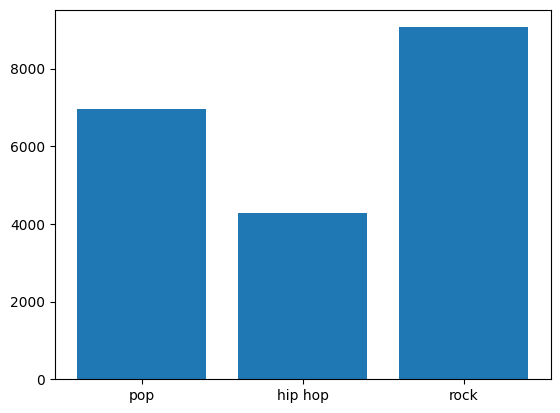

In [ ]:
plts.bar(lables,counts)